In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'Rings'
DISCOVERY_TIMEOUT_SECONDS=2800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/abalone/data.csv')
df['Rings'] = df['Rings'].astype(float)
df

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Length   4177 non-null   float64
 1   Diam     4177 non-null   float64
 2   Height   4177 non-null   float64
 3   Whole    4177 non-null   float64
 4   Shucked  4177 non-null   float64
 5   Viscera  4177 non-null   float64
 6   Shell    4177 non-null   float64
 7   Rings    4177 non-null   float64
dtypes: float64(8)
memory usage: 261.2 KB


None

,Length,Diam,Height,Whole,Shucked,Viscera,Shell,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/airfoil_self_noise/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('Velocity', 'Attack'), ('Displacement', 'Attack'), ('Pressure', 'Velocity'), ('Displacement', 'Velocity'), ('Pressure', 'Attack'), ('Attack', 'Velocity'), ('Pressure', 'Displacement'), ('Frequency', 'Chord'), ('Pressure', 'Frequency'), ('Velocity', 'Chord'), ('Chord', 'Attack'), ('Displacement', 'Chord'), ('Chord', 'Velocity'), ('Pressure', 'Chord'), ('Frequency', 'Attack'), ('Frequency', 'Velocity'), ('Attack', 'Chord')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(TARGET, axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      Length   Diam  Height   Whole  Shucked  Viscera   Shell  Rings
0      0.455  0.365   0.095  0.5140   0.2245   0.1010  0.1500   15.0
1      0.350  0.265   0.090  0.2255   0.0995   0.0485  0.0700    7.0
2      0.530  0.420   0.135  0.6770   0.2565   0.1415  0.2100    9.0
3      0.440  0.365   0.125  0.5160   0.2155   0.1140  0.1550   10.0
4      0.330  0.255   0.080  0.2050   0.0895   0.0395  0.0550    7.0
...      ...    ...     ...     ...      ...      ...     ...    ...
4172   0.565  0.450   0.165  0.8870   0.3700   0.2390  0.2490   11.0
4173   0.590  0.440   0.135  0.9660   0.4390   0.2145  0.2605   10.0
4174   0.600  0.475   0.205  1.1760   0.5255   0.2875  0.3080    9.0
4175   0.625  0.485   0.150  1.0945   0.5310   0.2610  0.2960   10.0
4176   0.710  0.555   0.195  1.9485   0.9455   0.3765  0.4950   12.0

[4177 rows x 8 columns], target='Rings', feature_mapping=[FeatureTypeMap(feature='Shell', type=<FeatureType.CONTINUOUS: 3>, importance=0.5078321139574566), Fe

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Abalone', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=      Length   Diam  Height   Whole  Shucked  Viscera   Shell  Rings
0      0.455  0.365   0.095  0.5140   0.2245   0.1010  0.1500   15.0
1      0.350  0.265   0.090  0.2255   0.0995   0.0485  0.0700    7.0
2      0.530  0.420   0.135  0.6770   0.2565   0.1415  0.2100    9.0
3      0.440  0.365   0.125  0.5160   0.2155   0.1140  0.1550   10.0
4      0.330  0.255   0.080  0.2050   0.0895   0.0395  0.0550    7.0
...      ...    ...     ...     ...      ...      ...     ...    ...
4172   0.565  0.450   0.165  0.8870   0.3700   0.2390  0.2490   11.0
4173   0.590  0.440   0.135  0.9660   0.4390   0.2145  0.2605   10.0
4174   0.600  0.475   0.205  1.1760   0.5255   0.2875  0.3080    9.0
4175   0.625  0.485   0.150  1.0945   0.5310   0.2610  0.2960   10.0
4176   0.710  0.555   0.195  1.9485   0.9455   0.3765  0.4950   12.0

[4177 rows x 8 columns], target='Rings', feature_mapping=[FeatureTypeMap(feature='Shell', type=<FeatureType.CONTINUOUS: 3>, importance=0.50783

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='Shell', type=<FeatureType.CONTINUOUS: 3>, importance=0.5078321139574566),
 FeatureTypeMap(feature='Shucked', type=<FeatureType.CONTINUOUS: 3>, importance=0.1658353103255407),
 FeatureTypeMap(feature='Whole', type=<FeatureType.CONTINUOUS: 3>, importance=0.08843499089542478),
 FeatureTypeMap(feature='Viscera', type=<FeatureType.CONTINUOUS: 3>, importance=0.07645932968627751),
 FeatureTypeMap(feature='Diam', type=<FeatureType.CONTINUOUS: 3>, importance=0.05461451673138582),
 FeatureTypeMap(feature='Height', type=<FeatureType.CONTINUOUS: 3>, importance=0.05445057631736008),
 FeatureTypeMap(feature='Length', type=<FeatureType.CONTINUOUS: 3>, importance=0.05237316208655452)]

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

GRaSP edge count: 19    

  0%|          | 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 19    
GRaSP completed in: 0.54s 


 51%|█████     | 512/1000 [15:34<10:48,  1.33s/it, disc=-.238, gen=-.187, regul_loss=0.0335, tot=-4.54]  

{'PC': None,
 'GS': None,
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffadf45fd0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=4.266411481003161, priority_score=0.5668934240362811, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 'IAMB': None,
 'SAM': None,
 'BES': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffadf45250>, model='BES', auc_pr=None, shd=None, sid=None, runtime=2.3360576489940286, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 'GRASP': None,
 'CGNN': None}

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffadf45fd0>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=4.266411481003161, priority_score=0.5668934240362811, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffadf45250>, model='BES', auc_pr=None, shd=None, sid=None, runtime=2.3360576489940286, priority_score=0.0, knowledge_integrity_score=1.0, forbidden_edges_violation_rate=0.0, required_edges_compliance_rate=1.0)]

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'CCDR': [EstimationResult(model='CCDR', treatment='Shell', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13cb64f0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13cb6940>, control_value=0, treatment_value=1, p_value=array([0.])),
  EstimationResult(model='CCDR', treatment='Shucked', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13cc1880>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13cc18e0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='CCDR', treatment='Whole', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13cc1940>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13cc19a0>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='CCDR', treatment='Viscera', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13cc1a

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  CCDR
Shell :  14.535675260987194
Shucked :  0
Whole :  0
Viscera :  0
Diam :  0
Height :  0
Length :  0



Model:  BES
Shell :  0
Shucked :  0
Whole :  0
Viscera :  0
Diam :  0
Height :  0
Length :  0


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable


{'CCDR': [RefutationResult(treatment='Shell', estimated_effect=14.535675260987194, p_value=0.94, new_effect=0.03311955825710756, model='PlaceboPermute', runtime=1.1865241380000953, passed=True),
  RefutationResult(treatment='Shell', estimated_effect=14.535675260987194, p_value=0.98, new_effect=14.53612699701709, model='RandomCommonCause', runtime=3.392953959002625, passed=True),
  RefutationResult(treatment='Shell', estimated_effect=14.535675260987194, p_value=0.94, new_effect=14.540156988714593, model='SubsetRemoval', runtime=1.236623150005471, passed=True)],
 'BES': []}

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': None,
 'GS': None,
 'CCDR': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "Shell"[width=1, height=1, label="Shell\n14.54", fillcolor="#4CAF50", fontcolor="white"];\n   "Shucked"[width=1, height=1, label="Shucked\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "Whole"[width=1, height=1, label="Whole\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "Viscera"[width=1, height=1, label="Viscera\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "Diam"[width=1, height=1, label="Diam\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0

PC
No graph
GS
No graph
CCDR


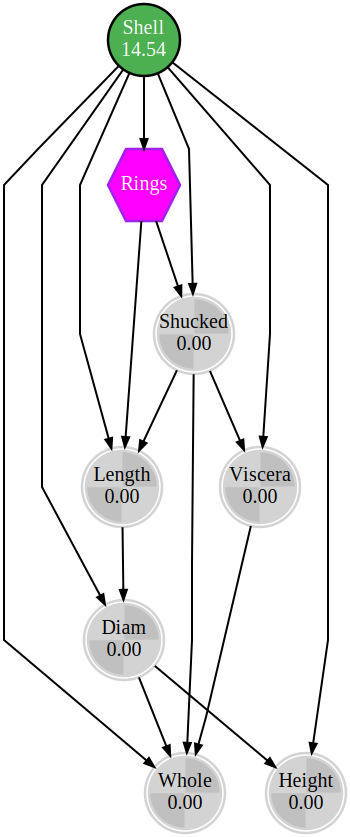

IAMB
No graph
SAM
No graph
BES


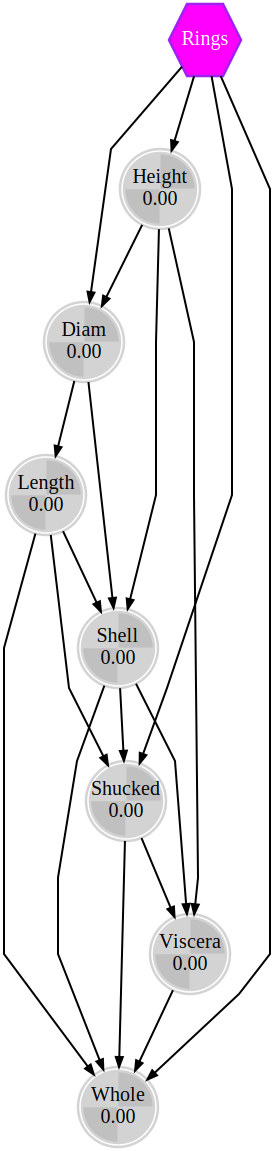

GRASP
No graph
CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))